
---

# **Project Proposal: House Price Prediction**

---

#### **Introduction:**
This project aims to develop a machine learning model to predict house prices based on various factors like area, quality, and other relevant features. The dataset provided is from the Kaggle competition for house price prediction, and it includes several features such as square footage, number of rooms, and neighborhood details that may influence the house price.

---

#### **Project Objective:**
The objective of this project is to:
- Build a predictive model using a dataset that includes house characteristics such as square footage, neighborhood quality, and other relevant features.
- Identify key factors that significantly impact house prices.
- Provide a machine learning solution to predict house prices for new, unseen data.

---

#### **Dataset:**
The project relies on the **House Price dataset**, which contains the following columns:
- **SalePrice:** The target variable (house price).
- **OverallQual:** Overall material and finish quality.
- **GrLivArea:** Above-ground living area square feet.
- **BsmtFinSF1:** Type 1 finished square footage of the basement.
- **GarageCars:** Size of garage in terms of car capacity.
- **TotalBsmtSF:** Total square feet of basement area.
- **YearBuilt:** Original construction date.
- **Fireplaces:** Number of fireplaces.
- **PoolArea:** Pool area in square feet.
- **LotArea:** Lot size in square feet.
- **Other features**: Various features related to house and lot size, materials, and more.

---

#### **Methodology:**

1. **Stage 1: Data Exploration (Data Exploration):**
   - Study the general distribution of the data through visualizations like **histograms**, **scatter plots**, and **correlation matrices**.
   - Identify columns with missing values or outliers and understand their relationship with the target variable (**SalePrice**).

2. **Stage 2: Data Preprocessing:**
   - **Handling Missing Values:** Use techniques such as replacing missing values with the **median** (for numerical columns) and **mode** (for categorical columns).
   - **Handling Outliers:** Use the **IQR** method to detect and handle outliers in numerical data.
   - **Feature Selection:** Drop irrelevant columns like `Id`, `MiscVal`, `MoSold`, etc.

3. **Stage 3: Encoding and Scaling:**
   - Convert categorical variables to numerical using **Label Encoding** to ensure that machine learning models can process them.
   - Standardize numerical features using **StandardScaler** to bring all features to a similar scale and improve model performance.

4. **Stage 4: Model Building:**
   - Implement machine learning algorithms to build the predictive model.
   - Train the model on the training dataset and validate its performance using various metrics such as **R² score** and **Mean Absolute Error (MAE)**.

5. **Stage 5: Prediction and Submission:**
   - Use the trained model to predict house prices for the test dataset.
   - Prepare the final submission file with predicted results.

---

#### **Proposed Models:**
- **Artificial Neural Networks (ANN):** A deep learning model with multiple layers that can learn complex relationships between the input features and target variable (house price).
- **Linear Regression (optional):** A simple, interpretable model that could be used as a baseline to compare against more complex models like ANN.
- **Random Forest Regression (optional):** An ensemble learning method that works well for predicting house prices, particularly in the presence of nonlinear relationships between features.

---

#### **Techniques and Tools:**
- **Programming Language:** Python
- **Libraries Used:** Pandas, NumPy, Scikit-learn, Keras (for ANN), Matplotlib, Seaborn
- **Machine Learning Techniques:** **Supervised Learning**, **Regression Models**, **Deep Learning** (ANN)

---

#### **Expected Outcomes:**
- The model is expected to achieve a **high accuracy** in predicting house prices, with an R² score of over $85$% and low prediction error.
- The model will provide insights into the most significant factors affecting house prices, such as **square footage**, **overall quality**, and **location**.

---

#### **Challenges:**
- **Missing Data:** Handling missing values effectively is crucial to ensure accurate predictions. The missing data threshold has been set at $80%$ to drop columns with excessive missing values.
- **Outliers:** Outliers can significantly skew predictions, so detecting and handling them appropriately is necessary for model performance.
- **Data Imbalance:** Some house price ranges may have more data points than others, affecting the training process.

---

#### **Expected Results:**
- Deliver a trained model capable of accurately predicting house prices for the given test dataset.
- Analyze and identify key factors influencing house prices such as **GrLivArea**, **OverallQual**, and **LotArea**.

---

### **Conclusion:**
The goal of this project is to develop a machine learning model that can predict house prices based on various factors related to the house and the surrounding environment. By applying various data processing techniques, machine learning algorithms, and deep learning models (ANN), we aim to create a model that not only predicts house prices accurately but also provides insights into the key features that drive those prices.

---

# 1. **Importing Libraries**

- In this step, we import the essential libraries we need to work with:
  - `numpy`: A library for mathematical operations and numerical analysis.
  - `pandas`: A library for data manipulation, such as reading data from files, cleaning, and analysis.
  - `seaborn`: A library for advanced plotting and data visualization.
  - `matplotlib`: A library for creating basic plots.


In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

---

# 2. **Loading and Inspecting the Data**

- In this step, we read CSV `data` files

- Then, we display the dataset using `head()` to review the content

In [73]:
import pandas as pd

data = pd.read_csv('/content/train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


- We use several methods to explore the data:
  - `.info()`: To get information about the columns, data types, and non-null values.
  - `.describe().T`: To get basic statistics like mean, standard deviation, and transpose the results for clarity.
  - `.columns`: To list the column names.
  - `.shape`: To get the dimensions of the dataset (number of rows and columns).


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [75]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [76]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [77]:
data.shape

(1460, 81)


### **Data Summary**

- The dataset contains **81 columns** and **1460 rows**.
- The columns with **int64 values** are **35 columns**.
- The columns with **float64 values** are **3 columns**.
- The columns with **object values** are **43 columns**.
- The columns with **missing values** are **16 columns**.

In [78]:
Target_column = data['SalePrice']

In [79]:
#data = data.drop('SalePrice', axis=1)

---

# 3. **Handling Missing Values**

**Checking for Missing Values**

- We check for missing values in the training and test datasets using `.isnull().sum()` to see how many missing values exist in each column.
- If there are columns with missing values, we display them using the condition `missing_values > 0`.


In [80]:
missing_valuse = data.isnull().sum().sort_values(ascending=False)
missing_columns = missing_valuse[missing_valuse > 0]
missing_columns

,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
FireplaceQu,690
LotFrontage,259
GarageYrBlt,81
GarageCond,81
GarageType,81


**Data Cleaning Summary**

- The code removes columns from the dataset that have more than **80% missing values**.
- A **missing value threshold** of **0.8** is applied, and any column with a percentage of missing values greater than this threshold is dropped.


In [81]:
missing_threshold = 0.8

columns_to_drop = missing_valuse[missing_valuse / len(data) > missing_threshold].index

data = data.drop(columns=columns_to_drop, axis=1)

**Data Type Categorization Summary**

- We identify the **numerical columns**, which are those with data types `int64` and `float64`. These columns represent integer or decimal values.  

- we identify the **categorical columns**, which are those with data types `object` and `category`. These columns represent categorical or label-based data, such as names or categories.

In [82]:
numerical = data.select_dtypes(include=['int64', 'float64'])
numerical_cols = numerical.columns

categorical = data.select_dtypes(include=['object', 'category'])
categorical_cols = categorical.columns

**Missing Value Imputation Summary**

We handle **missing values** in the dataset by filling them with appropriate values:  

- For **numerical columns**, we fill the missing values with the **median** of each column. This ensures that the central tendency of the data remains unchanged.

- For **categorical columns**, we fill the missing values with the **mode** (most frequent value) of each column.



In [83]:
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].median())

data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])



**Checking for Missing Values After Dropping Columns**

- We check for missing values again after dropping the unnecessary columns using `.isnull().sum()` to confirm that all missing values have been handled.


In [84]:
missing_valuse = data.isnull().sum().sort_values(ascending=False)
missing_columns = missing_valuse[missing_valuse > 0]
missing_columns

,0




---

# 4. **Exploratory Data Analysis**

##$🔻Correlation Matrix & Heatmap🔻$

- We display a correlation matrix between the numerical columns using `corr()` to understand the relationships between variables.
- This is visualized using a `heatmap` to show the strength of the relationships.


In [85]:
Correlation = numerical.corr()

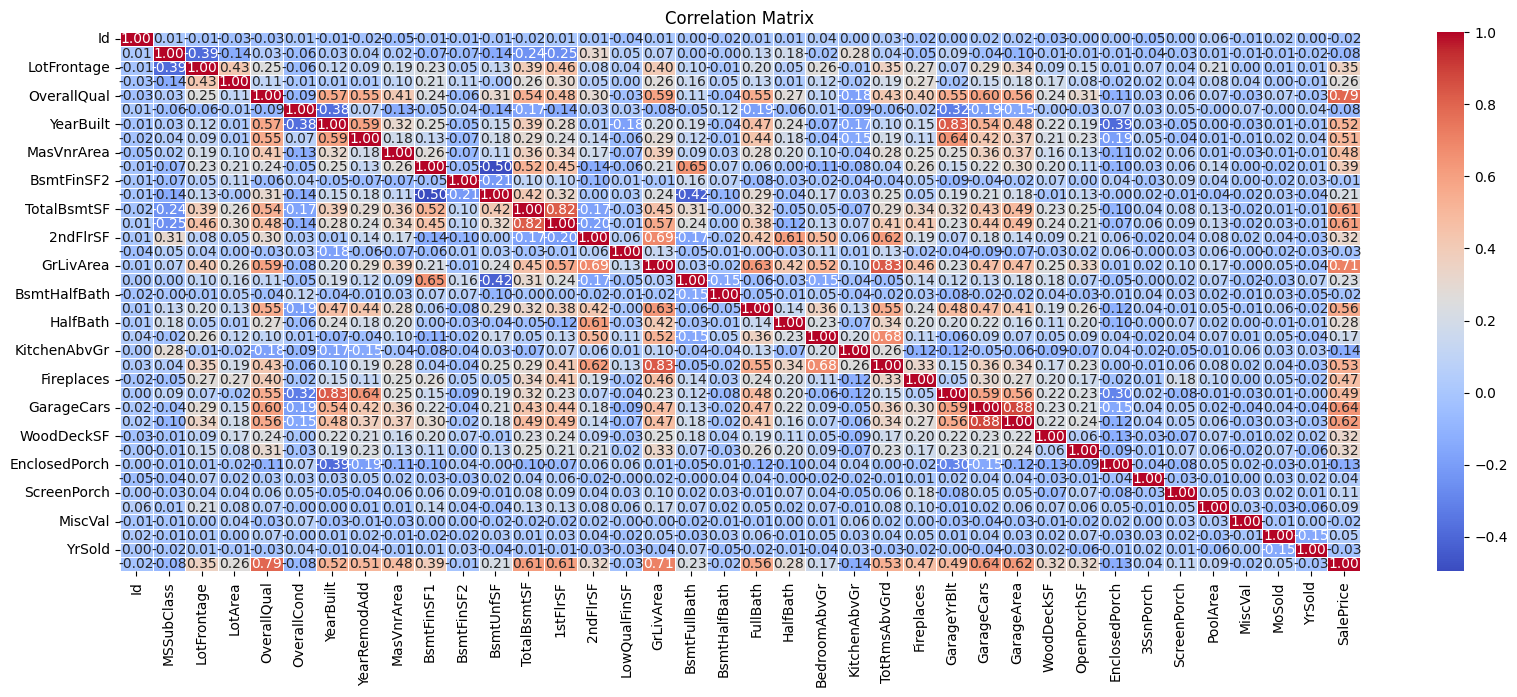

In [86]:
plt.figure(figsize=(20,7))

sns.heatmap(Correlation,
            annot=True,
            cmap='coolwarm',
            fmt='.2f',
            linewidths=0.5)

plt.title('Correlation Matrix')
plt.show()

##$🔻Histogram & Scatterplot🔻$



- We display a `Histogram` to visualize the distribution of `SalePrice`


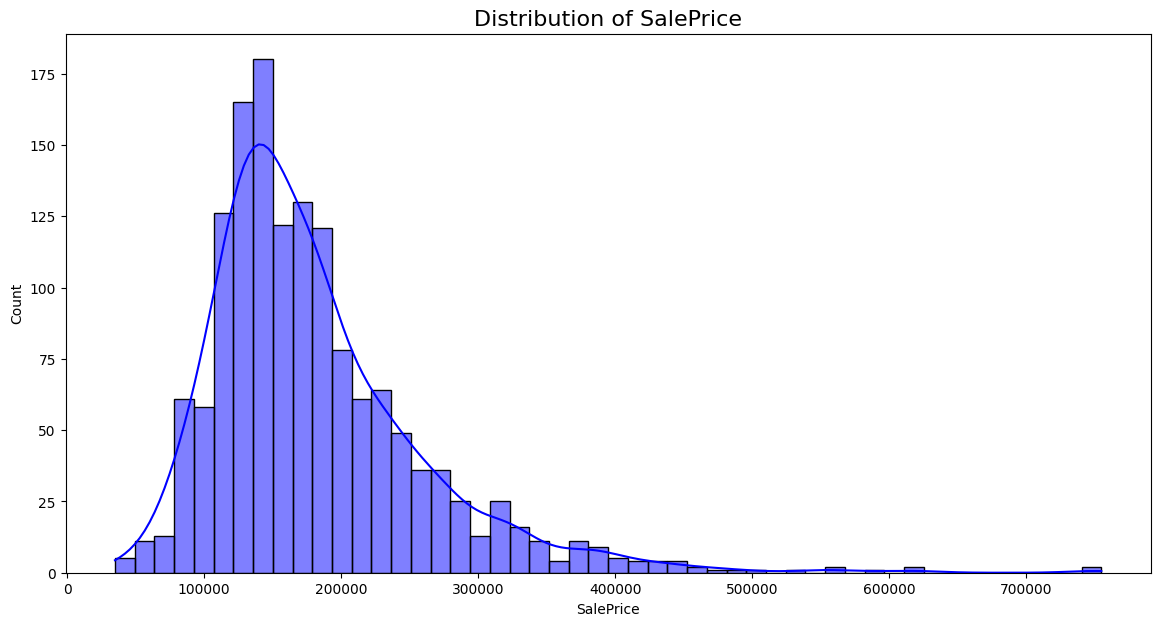

In [87]:
plt.figure(figsize=(14, 7))

sns.histplot(data['SalePrice'],
             kde=True,
             color='blue',
             bins=50)

plt.title('Distribution of SalePrice', fontsize=16)
plt.show()

**Histogram Insights**

- **Distribution Type**: The histogram suggests that the distribution of house sale prices is **not normal**.
  
- **Right Skew**: There is a **long right tail**, indicating a small number of houses with **very high sale prices**.

- **Influencing Factors**: This skewed distribution may be influenced by factors such as the presence of **luxury homes**, the **size of the houses**, their **location**, and other **property features**.

---



- We display a `Histogram` to visualize the distribution of `GrLivArea` by `Pclass`.


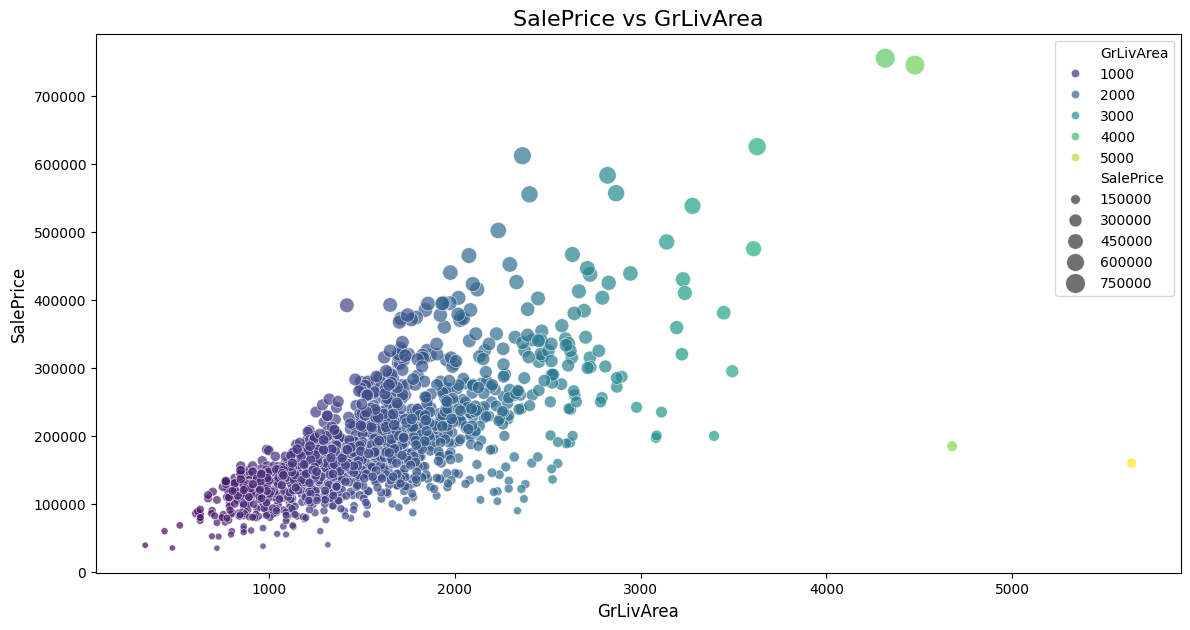

In [88]:
plt.figure(figsize=(14,7))

sns.scatterplot (data=data,
                x='GrLivArea',
                y=Target_column,
                hue='GrLivArea',
                palette='viridis',
                alpha=0.7,
                size='SalePrice',
                sizes=(20, 200))

plt.title('SalePrice vs GrLivArea' , fontsize=16)
plt.xlabel('GrLivArea' , fontsize=12)
plt.ylabel('SalePrice' , fontsize=12)

plt.show()

**SalePrice vs GrLivArea: Relationship and Insights**

The graph shows a positive correlation between **SalePrice** and **GrLivArea**, with SalePrice increasing as GrLivArea grows. However, there are some outliers, indicating that some larger homes may have lower SalePrices than expected due to other factors.

---

- We display a `Histogram` to visualize the distribution of `SalePrice` by `OverallQual`.


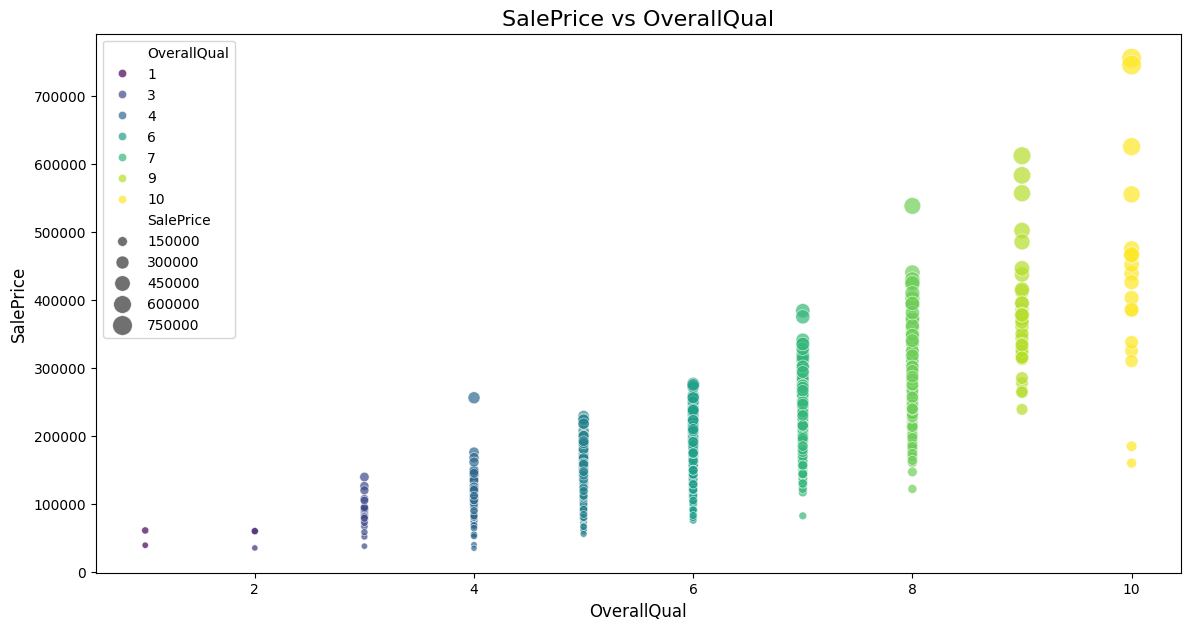

In [89]:
plt.figure(figsize=(14,7))

sns.scatterplot (data=data,
                x='OverallQual',
                y='SalePrice',
                hue='OverallQual',
                palette='viridis',
                alpha=0.7,
                size='SalePrice',
                sizes=(20, 200))

plt.title('SalePrice vs OverallQual' , fontsize=16)
plt.xlabel('OverallQual' , fontsize=12)
plt.ylabel('SalePrice' , fontsize=12)

plt.show()


 **OverallQual vs SalePrice: Scatter Plot Analysis**

SalePrice increases with higher quality. It also indicates clusters of data points around specific quality values, suggesting market segmentation based on quality levels.





---

# 5. **Handling Outliers**

- We handle the outliers using the `IQR` method, where we identify values that fall outside of this range and adjust them to be within the acceptable limits.


In [90]:
import numpy as np

for col in numerical_cols:

  Q1 = data[col].quantile(0.25)
  Q3 = data[col].quantile(0.75)

  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
  data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])



---


# 6. **Data Improvement by Removing Unimportant Columns**

- ## Removing Unimportant Columns

In [91]:
columns_to_drop = ['Id',
                   'MiscVal',
                   'MoSold',
                   'YrSold',
                   'LowQualFinSF',
                   'BsmtHalfBath',
                   '3SsnPorch']

data = data.drop(columns=columns_to_drop)

- ## Removing Columns with a Single Value

In [92]:
for column in data.columns:
  unique_count = data[column].nunique()
  print(f"Column '{column}' =  {unique_count}")

Column 'MSSubClass' =  13
Column 'MSZoning' =  5
Column 'LotFrontage' =  78
Column 'LotArea' =  1007
Column 'Street' =  2
Column 'LotShape' =  4
Column 'LandContour' =  4
Column 'Utilities' =  2
Column 'LotConfig' =  5
Column 'LandSlope' =  3
Column 'Neighborhood' =  25
Column 'Condition1' =  9
Column 'Condition2' =  8
Column 'BldgType' =  5
Column 'HouseStyle' =  8
Column 'OverallQual' =  9
Column 'OverallCond' =  6
Column 'YearBuilt' =  108
Column 'YearRemodAdd' =  61
Column 'RoofStyle' =  6
Column 'RoofMatl' =  8
Column 'Exterior1st' =  15
Column 'Exterior2nd' =  16
Column 'MasVnrType' =  3
Column 'MasVnrArea' =  244
Column 'ExterQual' =  4
Column 'ExterCond' =  5
Column 'Foundation' =  6
Column 'BsmtQual' =  4
Column 'BsmtCond' =  4
Column 'BsmtExposure' =  4
Column 'BsmtFinType1' =  6
Column 'BsmtFinSF1' =  631
Column 'BsmtFinType2' =  6
Column 'BsmtFinSF2' =  1
Column 'BsmtUnfSF' =  755
Column 'TotalBsmtSF' =  699
Column 'Heating' =  6
Column 'HeatingQC' =  5
Column 'CentralAir' 

In [93]:
single_value_columns = [col for col in data.columns if data[col].nunique() == 1]

print("Columns with a single unique value:", single_value_columns)

Columns with a single unique value: ['BsmtFinSF2', 'KitchenAbvGr', 'EnclosedPorch', 'ScreenPorch', 'PoolArea']


In [94]:
print("BsmtFinSF2 value counts:")
print(data['BsmtFinSF2'].value_counts())

print("\nKitchenAbvGr value counts:")
print(data['KitchenAbvGr'].value_counts())

print("\nEnclosedPorch value counts:")
print(data['EnclosedPorch'].value_counts())

print("\nScreenPorch value counts:")
print(data['ScreenPorch'].value_counts())

print("\nPoolArea value counts:")
print(data['PoolArea'].value_counts())

BsmtFinSF2 value counts:
BsmtFinSF2
0.0    1460
Name: count, dtype: int64

KitchenAbvGr value counts:
KitchenAbvGr
1.0    1460
Name: count, dtype: int64

EnclosedPorch value counts:
EnclosedPorch
0.0    1460
Name: count, dtype: int64

ScreenPorch value counts:
ScreenPorch
0.0    1460
Name: count, dtype: int64

PoolArea value counts:
PoolArea
0.0    1460
Name: count, dtype: int64


In [95]:
data = data.drop(columns=single_value_columns, axis=1)



---

# 7. **Data Preprocessing: Transformation and Scaling**

### $Encoding$

❐ **Objective**: Improve the performance of the data analysis model by representing categorical values as numbers.

❐ **Label Encoding :** We will use Label Encoding to transform categorical values into numerical representations, facilitating better understanding by machine learning models.


In [96]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
LE

LabelEncoder()

In [97]:
for column in categorical_cols:
  data[column] = LE.fit_transform(data[column])

### $Scaling$

❐ **Objective**: Improve the performance of the data analysis model by standardizing numerical features.

❐ **StandardScaler**: We will use StandardScaler to standardize the data, transforming it to have a mean of zero and a standard deviation of one, which helps machine learning models perform better.


In [98]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler

StandardScaler()

In [99]:
data_scaled = scaler.fit_transform(data)

data = pd.DataFrame(data_scaled, columns=data.columns)



---

# 8. **Splitting the Data into Independent and Target Variables**

❐ **Objective** : Separate the dataset into features (**X**) and target (**y**) for model preparation.

❐ **Purpose** : Isolate independent variables (**X**) and the dependent variable (**y**) to streamline the modeling process.

In [100]:
X = data.drop("SalePrice", axis=1)
y = data["SalePrice"]

In [101]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [102]:
y

,SalePrice
0,0.463935
1,0.062047
2,0.687207
3,-0.555671
4,1.081653
...,...
1455,-0.034704
1456,0.486262
1457,1.327251
1458,-0.524041


# 9. **Building an ANN Network**

- We are creating a `Sequential` neural network model using `Keras` to perform regression.


In [103]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping ,ReduceLROnPlateau

model = Sequential()

model.add(Input(shape=(X_train.shape[1],)))

model.add(Dense(units=64, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(units=32, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(1, activation='linear'))

my_optimizer = Adam(learning_rate=0.01)

model.compile(optimizer=my_optimizer, loss='mse', metrics=['mae'])

early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=100, batch_size=12, callbacks=[early_stopping])

Epoch 1/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.0432 - mae: 0.7645 - val_loss: 0.2220 - val_mae: 0.3513
Epoch 2/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2671 - mae: 0.3979 - val_loss: 0.1119 - val_mae: 0.2429
Epoch 3/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2326 - mae: 0.3654 - val_loss: 0.1174 - val_mae: 0.2518
Epoch 4/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2147 - mae: 0.3512 - val_loss: 0.1347 - val_mae: 0.2476
Epoch 5/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1819 - mae: 0.3348 - val_loss: 0.1053 - val_mae: 0.2345
Epoch 6/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1846 - mae: 0.3357 - val_loss: 0.1083 - val_mae: 0.2357
Epoch 7/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1562 - mae: 0.3023 - val_loss: 0.1346 - val_mae: 0.2681
Epoch 8/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1778 - mae: 0.3120 - val_loss: 0.0932 - val_mae: 0.2156
Epoch 9/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.143

- We have successfully defined, compiled, and trained the model on the training data (**`X_train`**, **`y_train`**) with validation on the test data (**`X_test`**, **`y_test`**).

- The model was trained for $100$ **epochs** with a batch size of $12$ and utilized **EarlyStopping** to prevent overfitting by halting the training if the validation loss doesn't improve after $15$ **epochs**.

- **Batch Normalization** was used after each hidden layer to stabilize and accelerate the training process.


- Predicting on Training Data

In [104]:
y_predict = model.predict(X_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


- Calculating $R²$ on Training Data

In [105]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_predict)
r2

0.9104159961817914

- plot Loss

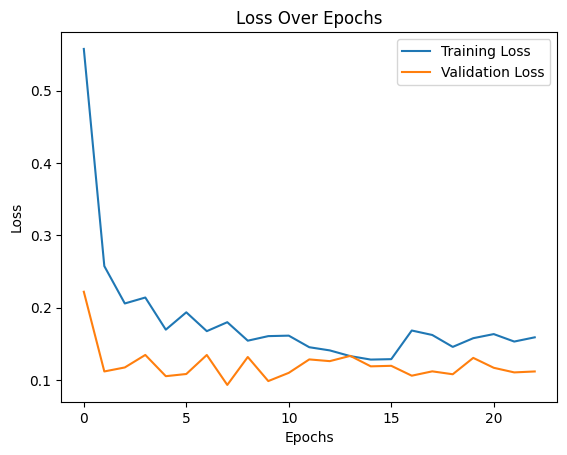

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.plot(history.history['loss'] , label ='Training Loss')
plt.plot(history.history['val_loss'] , label ='Validation Loss')
plt.legend()
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

- plot Mean Absoulte Error

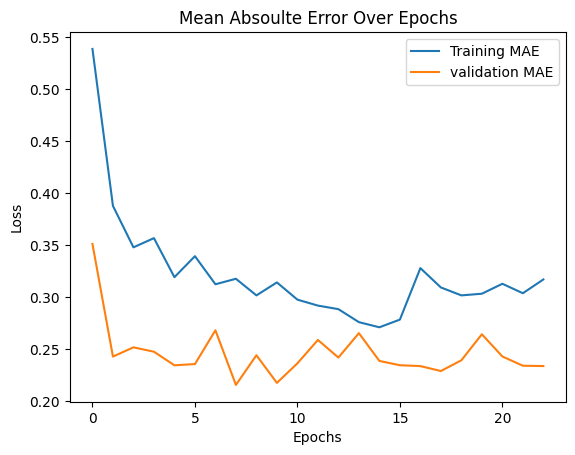

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.plot(history.history['mae'] , label ='Training MAE')
plt.plot(history.history['val_mae'] , label ='validation MAE')
plt.legend()
plt.title('Mean Absoulte Error Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

---

#  10. **Loading and Inspecting the Test Data**

In [108]:
data_test = pd.read_csv('/content/test.csv')
data_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [109]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

---

# 11. **Test Data Preprocessing**

### $Handling$ $Missing$ $Values$


In [110]:
missing_valuse = data_test.isnull().sum().sort_values(ascending=False)
missing_columns = missing_valuse[missing_valuse > 0]
missing_columns

,0
PoolQC,1456
MiscFeature,1408
Alley,1352
Fence,1169
MasVnrType,894
FireplaceQu,730
LotFrontage,227
GarageYrBlt,78
GarageQual,78
GarageFinish,78


In [111]:
missing_threshold = 0.8

columns_to_drop = missing_valuse[missing_valuse / len(data_test) > missing_threshold].index

data_test = data_test.drop(columns=columns_to_drop, axis=1)

In [112]:
numerical = data_test.select_dtypes(include=['int64', 'float64'])
numerical_cols = numerical.columns

categorical = data_test.select_dtypes(include=['object', 'category'])
categorical_cols = categorical.columns

In [113]:
data_test[numerical_cols] = data_test[numerical_cols].fillna(data_test[numerical_cols].median())

data_test[categorical_cols] = data_test[categorical_cols].fillna(data_test[categorical_cols].mode().iloc[0])

In [114]:
missing_valuse = data_test.isnull().sum().sort_values(ascending=False)
missing_columns = missing_valuse[missing_valuse > 0]
missing_columns

,0


### $Dropping$ $Unimportant$ $Columns$

In [115]:
columns_to_drop = ['Id',
                   'MiscVal',
                   'MoSold',
                   'YrSold',
                   'LowQualFinSF',
                   'BsmtHalfBath',
                   '3SsnPorch',
                   'BsmtFinSF2',
                   'KitchenAbvGr',
                   'EnclosedPorch',
                   'ScreenPorch',
                   'PoolArea']

data_test = data_test.drop(columns=columns_to_drop)

### $Encoding$

In [116]:
for column in categorical_cols:
  data_test[column] = LE.fit_transform(data_test[column])

### $Scaling$

In [117]:
data_test_scaled = scaler.fit_transform(data_test)

data_test = pd.DataFrame(data_test_scaled, columns=data_test.columns)



---

# 12. **Model Predictions on Test Data**

In [118]:
data_test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,SaleType,SaleCondition
0,-0.874711,-1.501777,0.567330,0.363929,0.06426,0.742620,0.31870,0.0,0.572445,-0.207992,...,0.933169,-0.988189,1.185921,0.250409,0.186902,0.339114,0.366678,-0.701628,0.32475,0.201383
1,-0.874711,-0.039098,0.615963,0.897861,0.06426,-1.384637,0.31870,0.0,-1.950811,-0.207992,...,0.933169,-0.988189,-0.741235,0.250409,0.186902,0.339114,2.347867,-0.178826,0.32475,0.201383
2,0.061351,-0.039098,0.275532,0.809646,0.06426,-1.384637,0.31870,0.0,0.572445,-0.207992,...,-1.491575,0.301406,0.042537,0.250409,0.186902,0.339114,0.930495,-0.207871,0.32475,0.201383
3,0.061351,-0.039098,0.470064,0.032064,0.06426,-1.384637,0.31870,0.0,0.572445,-0.207992,...,-1.491575,0.301406,-0.012788,0.250409,0.186902,0.339114,2.089451,-0.178826,0.32475,0.201383
4,1.465443,-0.039098,-1.232092,-0.971808,0.06426,-1.384637,-2.53396,0.0,0.572445,-0.207992,...,-0.279203,0.301406,0.153187,0.250409,0.186902,0.339114,-0.729632,0.489198,0.32475,0.201383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2.401505,1.423581,-2.302019,-1.591330,0.06426,0.742620,0.31870,0.0,0.572445,-0.207992,...,0.933169,-2.277784,-2.179687,0.250409,0.186902,0.339114,-0.729632,-0.701628,0.32475,0.201383
1455,2.401505,1.423581,-2.302019,-1.599808,0.06426,0.742620,0.31870,0.0,0.572445,-0.207992,...,0.933169,-0.988189,-0.861106,0.250409,0.186902,0.339114,-0.729632,-0.353093,0.32475,-3.589818
1456,-0.874711,-0.039098,4.457971,2.055150,0.06426,0.742620,0.31870,0.0,0.572445,-0.207992,...,0.933169,0.301406,0.475916,0.250409,0.186902,0.339114,2.982161,-0.701628,0.32475,-3.589818
1457,0.646389,-0.039098,-0.308065,0.125527,0.06426,0.742620,0.31870,0.0,0.572445,-0.207992,...,0.933169,-2.277784,-2.179687,0.250409,0.186902,0.339114,-0.103169,-0.236915,0.32475,0.201383


In [119]:
y_pred = model.predict(data_test)

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


- Transforming predicted values back to their original scale using StandardScaler

In [120]:
scal = StandardScaler()
Target_column = scal.fit_transform(Target_column.values.reshape(-1, 1))
y_pred = scal.inverse_transform(y_pred)

In [121]:
y_pred

array([[111225.305],
       [149900.45 ],
       [182671.08 ],
       ...,
       [137006.22 ],
       [128042.39 ],
       [256847.48 ]], dtype=float32)



---

# 13. **Preparing and Exporting Final Predictions**

In [122]:
submission = pd.read_csv('/content/sample_submission.csv')
submission

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [123]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         1459 non-null   int64  
 1   SalePrice  1459 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 22.9 KB


In [124]:
y_pred = y_pred.flatten()
y_pred

array([111225.305, 149900.45 , 182671.08 , ..., 137006.22 , 128042.39 ,
       256847.48 ], dtype=float32)

In [125]:
submission['SalePrice'] = y_pred

submission.head()

,Id,SalePrice
0,1461,111225.304688
1,1462,149900.453125
2,1463,182671.078125
3,1464,188369.296875
4,1465,193588.171875


In [126]:
submission.to_csv('/content/submission_final.csv', index=False)

In [127]:
print("Submission Files Created! by [Rami Abdullah]")

Submission Files Created! by [Rami Abdullah]
